In [1]:
### import libraries ###

import spacy # NLP library in Python
import pandas as pd # data manipulation and analysis
from collections import Counter # for counting occurrences of elements

import matplotlib.pyplot as plt # to create plots to visualize data
import seaborn as sns # data visualization
sns.set_theme(style="darkgrid") # theme for Seaborn plots

import ru_core_news_sm # a small language model to process the text in Russian

/Users/geniaviskovatykh/Desktop/UPF/Subjects/NLP/ZLA project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/ny/dyq93n6d6rqfzrtjrp2j6mn00000gn/T/ipykernel_32932/1871012862.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data manipulation and analysis


In [2]:
import urllib.request #for opening/reading URLs
book_url = 'https://www.gutenberg.org/cache/epub/37196/pg37196.txt' #URL of book to read

book_text = urllib.request.urlopen(book_url) # open URL as "book_text"
book_text = book_text.read()                 #returns all bytes from "book_text"
book_text = book_text.decode("utf-8")        #decode as UTF-8

# Exclude lines from 0 to 37 and from 627 to the end
excluded_lines = list(range(1, 38)) + list(range(628, len(book_text.split('\n')) + 1))

# Split the text into lines and filter out undesired lines
filtered_lines = [line for line_number, line in enumerate(book_text.split('\n'), start=1) if line_number not in excluded_lines]

# russian model calls the function .load() to process the text and assign the processing to a variable
nlp = ru_core_news_sm.load()

In [3]:
# to concatenate the filtered lines into a single string
text = ' '.join(filtered_lines)

# process the text:  tokenization, PoS tagging, and NER and create 'doc' object that contains the processed text
doc = nlp(text)

In [5]:
data = {'word': [], 'frequency': [], 'length': []} # empty dictionary with three keys: 'word', 'frequency', and 'length'

for token in doc: # a loop that iterates over each token in the spaCy document

    if not token.is_stop and not token.is_punct: # check if the token is not a stop word, not a punctuation mark

        # debugging: to check for '\r' and non-empty after stripping and remove all the words formed by less that 2 letters
        if '\r' not in token.text and token.text.strip() and len(token.text) > 2:

            if token.text not in data['word']: # checks if the token is not already in the 'word' list of the dictionary:

              # add the cleaned token to the 'word' list, appends the frequency as 1 to the 'frequency' list,
              # and append the length of the word to the 'length' list:
                data['word'].append(token.text)
                data['frequency'].append(1)
                data['length'].append(len(token.text))

            # if the token is already in the dictionary,
            # it finds the index of the word and increments its frequency:
            else:
                index = data['word'].index(token.text)
                data['frequency'][index] += 1

In [6]:
# convert the 'data' dictionary into a pandas DataFrame:
df = pd.DataFrame(data)

# sort the DataFrame by the 'frequency' column in descending order:
df.sort_values(by = 'frequency', ascending = False, inplace = True)

# add a new column 'rank' to the DataFrame giving the rank of each word based on frequency:
df['rank'] = list(range(1, len(df) + 1))

# display the top 25 words by frequency along with their ranks:
df[:25]

,word,frequency,length,rank
362,женщин,37,6,1
225,женщины,28,7,2
485,работниц,16,8,3
266,время,16,5,4
282,войны,14,5,5
1,стран,12,5,6
372,борьбы,11,6,7
963,движение,11,8,8
1302,Сербии,10,6,9
301,партии,10,6,10


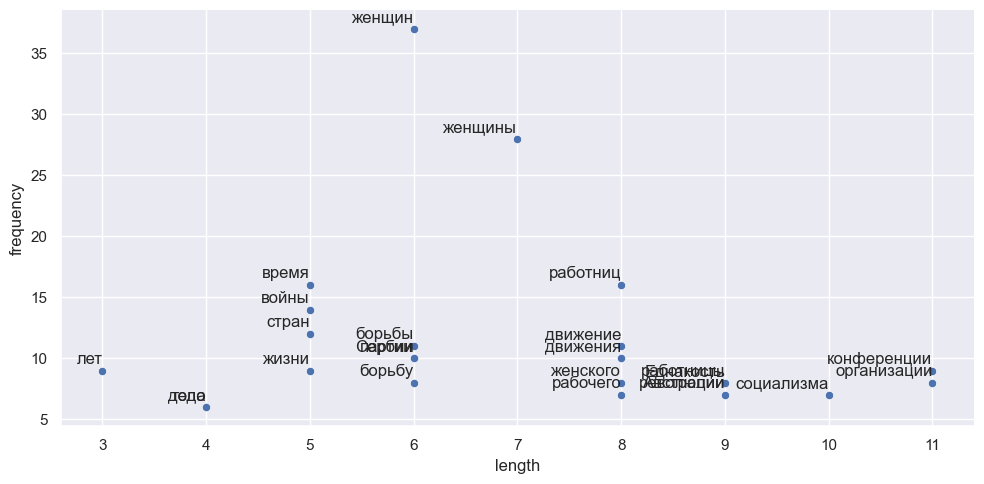

In [7]:
### create a scatter plot ###

# define the subset of top 25 words to display on the plot:
df_subset = df[:25]

# create a scatter plot to visualize the relationship between the length of words and their frequencies:
sns.relplot(x = 'length', y = 'frequency', data = df_subset, aspect = 2)

# annotate each point with corresponding words:
for i, row in df_subset.iterrows():
    plt.annotate(row['word'], (row['length'], row['frequency']),
                 textcoords = "offset points", xytext = (0,5), ha ='right')

# set x-axis ticks to integer values
plt.xticks(list(range(int(df_subset['length'].min()), int(df_subset['length'].max()) + 1)))

# display the plot
plt.show()